# Introduction

This code snippet demonstrates the necessary libraries and modules for a machine learning project involving natural language processing (NLP) using PyTorch and the Hugging Face Transformers library. The task likely involves text classification using the BERT model.

## Libraries

### Data Manipulation and Numerical Operations
- `pandas` (imported as `pd`): Used for data manipulation, such as reading datasets into dataframes.
- `numpy` (imported as `np`): Utilized for numerical operations and array manipulation.

### Data Visualization
- `matplotlib.pyplot` (imported as `plt`): Primarily employed for data visualization tasks.
- `seaborn` (imported as `sns`): Used for advanced visualization, often in conjunction with `matplotlib`.

### Machine Learning
- `sklearn.model_selection`: Contains functions for splitting datasets into training and testing sets.
- `sklearn.metrics`: Provides various metrics for evaluating machine learning models, including accuracy, classification reports, and confusion matrices.

### Deep Learning (PyTorch and Transformers)
- `torch`: PyTorch library, utilized for deep learning tasks.
- `transformers`: A library from Hugging Face for pre-trained language models and NLP tasks.

## Machine Learning Components

### Data Splitting
- `train_test_split`: Function from `sklearn.model_selection` used to split data into training and testing sets.

### Model Evaluation
- `accuracy_score`: Computes the accuracy of a classification model.
- `classification_report`: Generates a detailed classification report, including precision, recall, and F1-score.
- `confusion_matrix`: Creates a confusion matrix to evaluate classification performance.

## Deep Learning Components

### Hugging Face Transformers
- `BertTokenizer`: Tokenizer for the BERT model, used to preprocess text data.
- `BertForSequenceClassification`: BERT model fine-tuned for sequence classification tasks.
- `AdamW`: Optimizer for training neural networks, particularly effective with Transformer architectures.

### PyTorch Data Handling
- `TensorDataset`: Dataset wrapping tensors, allowing for easy slicing and indexing.
- `DataLoader`: Iterator that loads data in batches, facilitating training and evaluation.
- `RandomSampler` and `SequentialSampler`: Sampling strategies used for creating data loaders, typically for training and validation datasets.



## Introduction to Models and Methods

This implementation utilizes state-of-the-art transformer-based models for sequence classification tasks. The primary models employed are:

### 1. BERT (Bidirectional Encoder Representations from Transformers)
BERT is a pre-trained transformer-based model introduced by Google. It has achieved remarkable success in various natural language processing (NLP) tasks, including sequence classification. BERT captures bidirectional contextual information from input sequences, enabling it to generate high-quality embeddings for downstream tasks.

### 2. XLM-RoBERTa (Cross-lingual Language Model - RoBERTa)
XLM-RoBERTa is an extension of RoBERTa, a variant of BERT introduced by Facebook AI. XLM-RoBERTa is pre-trained on multilingual data, making it effective for sequence classification tasks involving multiple languages. It leverages large-scale pre-training and advanced training strategies to achieve strong performance across diverse languages.

### 3. DistilBERT
DistilBERT is a distilled version of BERT introduced by Hugging Face. It retains much of the original BERT's performance while being significantly smaller and faster. DistilBERT achieves compression through knowledge distillation and parameter reduction techniques, making it suitable for deployment in resource-constrained environments.

### Methods Used:

- **Text Preprocessing:** Before model training, the text data undergoes preprocessing steps such as normalization, tokenization, and removal of stopwords to ensure compatibility with the models.

- **Tokenization and Data Preparation:** The text data is tokenized using BERT tokenizer, and sequences are padded and converted into input tensors for model training. Additionally, labels are encoded as integers and DataLoader objects are created for efficient batch processing.

- **Model Training:** The pre-trained transformer-based models are trained on the train dataset using AdamW optimizer, learning rate scheduling, and hyperparameters tuning. Training is performed for multiple epochs to optimize model parameters.

- **Model Evaluation:** After training, the models are evaluated on a separate validation dataset to assess their performance and prevent overfitting. Metrics such as accuracy, precision, recall, and F1-score are calculated to measure model effectiveness.

- **Performance Analysis:** Finally, the best-performing model is selected based on validation accuracy and evaluated on a held-out test dataset. Performance metrics and visualizations, including accuracy, classification report, and confusion matrix, are generated to analyze model performance and provide insights into its behavior.



# Importing necessary libraries

In [4]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualization

# Importing libraries for machine learning
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation

# Importing PyTorch and Hugging Face Transformers
import torch  # PyTorch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW  # Hugging Face Transformers

# Importing PyTorch data handling utilities
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler


## Additional Library Installation

To install the `hazm` library, you can use pip:

```bash
!pip install hazm


In [5]:
!pip install hazm

  Using cached hazm-0.10.0-py3-none-any.whl.metadata (11 kB)
  Using cached fasttext_wheel-0.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.4 MB)
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached python_crfsuite-0.9.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Using cached hazm-0.10.0-py3-none-any.whl (892 kB)
Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached python_crfsuite-0.9.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's depen

# Importing necessary libraries

This code snippet demonstrates how to preprocess Persian text using the `hazm` library and perform data manipulation with `pandas`.

## Libraries

### Data Manipulation and Persian Text Processing
- `pandas` (imported as `pd`): Used for data manipulation, such as reading datasets into dataframes.
- `hazm`: A Python library for Persian text processing tasks including tokenization, normalization, and removing stopwords. 
  - `word_tokenize`: Tokenizes Persian text.
  - `stopwords_list`: Provides a list of Persian stopwords.
  - `Normalizer`: Normalizes Persian text by removing diacritics and normalizing characters.


In [6]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
from hazm import word_tokenize, stopwords_list, Normalizer, Lemmatizer  # For Persian text processing

# Load the dataset
df = pd.read_csv("persian_authors.csv")

# Define a normalizer to normalize the texts
normalizer = Normalizer()

# Tokenize, remove stopwords, and normalize the texts
def preprocess_text(text):
    # Normalize the text
    normalized_text = normalizer.normalize(text)
    
    # Tokenize the text
    tokens = word_tokenize(normalized_text)
    
    # Remove stopwords
    clean_tokens = [token for token in tokens if token not in stopwords_list()]
    
    # Join tokens back into a single string
    cleaned_text = ' '.join(clean_tokens)
    
    return cleaned_text

# Apply preprocessing to all texts in the dataset
df['text'] = df['text'].apply(preprocess_text)

# Function to limit the number of words in each text
def limit_df(text, n_word=500):
    try:
        return " ".join(text.split()[:n_word] if text else "")
    except:
        return "-"

# Limiting the number of words in each text
texts = list(map(limit_df, list(df["text"])))
df["text"] = texts

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the preprocessed dataset
print(df.head())


   Unnamed: 0   author   b_name   p_name  \
0         289    jooya    jooya    jooya   
1           9  moulavi  moulavi  moulavi   
2          57     rahi     rahi     rahi   
3          60     rahi     rahi     rahi   
4          25  moulavi  moulavi  moulavi   

                                                text  
0  کو دل شیر جرأت نشان رود‌گر شیران مهد امان طوفا...  
1  ای عاشقان‌ای عاشقان گه وصل لقا آسمان ندا کای م...  
2  دل ساقی نگاهی مستم ، جامی بری دستم چشم فتنه ان...  
3  دل ساقی نگاهی مستم ، جامی بری دستم چشم فتنه ان...  
4  بشکن چنگ را‌ای معلا ! هزاران چنگ هست چو چنگ عش...  


## Determining the Number of Labels

In this code snippet, the number of unique labels (authors) in the dataset is determined to establish the appropriate number of output labels for the classification task.



In [7]:
num_labels=len(df['author'].unique())

## Visualizing Author Distribution

This code snippet visualizes the distribution of authors in the dataset using a categorical plot.

- The `seaborn` library is imported as `sns` for advanced visualization.
- The `matplotlib.pyplot` module is imported as `plt` for data visualization.
- The `sns.catplot()` function is used to create a categorical plot (catplot) to visualize the distribution of authors in the dataset.
- The `x` parameter specifies the column containing the authors.
- The `kind` parameter is set to `'count'` to create a count plot.
- Finally, `plt.show()` is called to display the plot.

This visualization helps to understand the distribution of authors in the dataset, providing insights into the class distribution for the classification task.


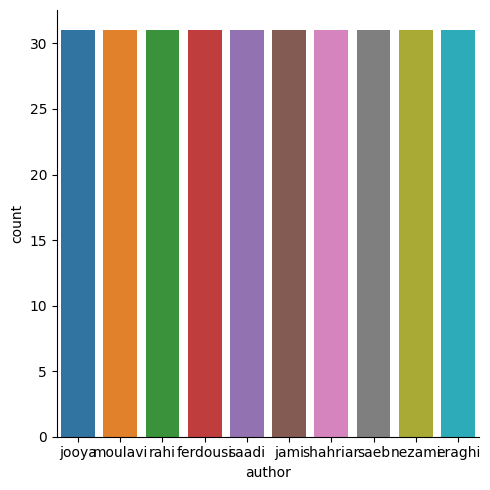

In [8]:
sns.catplot(data=df, x='author', kind='count')
plt.show()

## Adding Word Count Column and Creating Histogram Plot

This code snippet adds a new column to the dataframe to count the number of words in each text and creates a histogram plot to visualize the distribution of word counts.

- The number of words in each text is calculated by counting the spaces and adding one.
- A new column named `'word_count'` is created in the dataframe to store the word counts.
- The `seaborn` library is used to create a histogram plot (`histplot`) with KDE (Kernel Density Estimation) enabled.
- The `x` parameter specifies the column containing the word counts.
- The `hue` parameter is set to `'author'` to differentiate the histograms by author.
- Finally, `plt.show()` is called to display the plot.

This visualization helps to understand the distribution of word counts in the texts across different authors.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

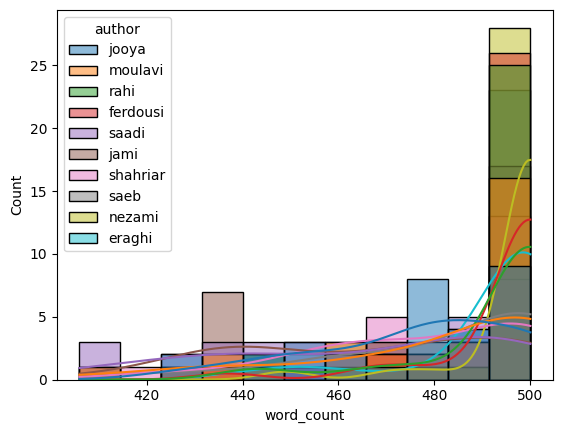

In [9]:
# Count spaces plus one for the number of words and add it as a new column
df['word_count'] = df['text'].str.count(' ') + 1

# Create a histogram plot with seaborn
sns.histplot(data=df, x='word_count', hue='author', kde=True)

# Show the plot
plt.show()


## Tokenizing Text Data with BERT Tokenizer and Preparing DataLoaders

This code snippet demonstrates how to tokenize text data using a BERT tokenizer, split the dataset into train, validation, and test sets, and prepare DataLoader objects for each set.

- The `BertTokenizer` is imported from the Hugging Face Transformers library to tokenize the text data. The tokenizer is initialized with the "bert-base-multilingual-cased" model.
- A function named `tokenize_texts` is defined to tokenize and pad sequences, and create attention masks. It takes a list of texts, tokenizer object, and optional maximum length as input and returns input ids and attention masks as PyTorch tensors.
- The dataset is split into train, validation, and test sets using `train_test_split` from `sklearn.model_selection`. The train-test split ratio is 80:20, and then the train-validation split ratio is 90:10.
- The texts in each set are tokenized using the `tokenize_texts` function, resulting in input ids and attention masks for train, validation, and test sets.
- Labels are converted to integers using a label dictionary, where each author is mapped to a unique integer.
- Labels are converted to PyTorch tensors.
- DataLoader objects are created for each set using `TensorDataset`, `RandomSampler`, and `SequentialSampler` for train, validation, and test sets, respectively. The DataLoader splits the dataset into mini-batches of a specified batch size.

This process prepares the text data for training and evaluation with a BERT-based model, ensuring compatibility with PyTorch's DataLoader for efficient batch processing.


In [10]:


# Tokenize text data using a BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Tokenize and pad sequences, and create attention masks
def tokenize_texts(texts, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
                            text,
                            add_special_tokens = True,
                            max_length = max_length,
                            padding = 'max_length',
                            truncation=True,
                            return_attention_mask = True,
                            return_tensors = 'pt'
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

# Split dataset into train, validation, and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['author'], test_size=0.2, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.1, random_state=42)

# Tokenize the texts
train_input_ids, train_attention_masks = tokenize_texts(train_texts, tokenizer)
val_input_ids, val_attention_masks = tokenize_texts(val_texts, tokenizer)
test_input_ids, test_attention_masks = tokenize_texts(test_texts, tokenizer)

# Convert labels to integers
label_dict = {author: idx for idx, author in enumerate(df['author'].unique())}
train_labels = train_labels.map(label_dict)
val_labels = val_labels.map(label_dict)
test_labels = test_labels.map(label_dict)

# Convert labels to tensors
train_labels = torch.tensor(train_labels.values)
val_labels = torch.tensor(val_labels.values)
test_labels = torch.tensor(test_labels.values)


# Create DataLoader for each set
batch_size = 16

train_data = TensorDataset(train_input_ids, train_attention_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_input_ids, val_attention_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

test_data = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

# Base BERT model

## Training BERT Model for Sequence Classification

This code snippet demonstrates how to train a pre-trained BERT model for sequence classification using PyTorch.

- The `BertForSequenceClassification` model is imported from the Hugging Face Transformers library and initialized with the "bert-base-multilingual-cased" pre-trained model. The number of labels is set to the number of unique authors in the dataset.
- An optimizer (AdamW) is defined with a specified learning rate.
- Hyperparameters such as epochs and batch size are set.
- A learning rate scheduler (CosineAnnealingLR) is defined based on the total number of training steps.
- The model is moved to the appropriate device (GPU if available).
- The training loop iterates over each epoch, and within each epoch, over each batch of the training data. The model is set to training mode, and gradients are calculated and updated based on the loss. Gradients are clipped to prevent exploding gradients. The learning rate scheduler is updated at each step.
- After each epoch, the model is evaluated on the validation data to compute the validation accuracy.
- The best model based on validation accuracy is saved.
- At the end of training, the best model is loaded for further evaluation or inference.

This training process enables the BERT model to learn from the data and optimize its parameters to make accurate predictions for the sequence classification task.


In [11]:
# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=len(df['author'].unique()))

# Define optimizer and learning rate
learning_rate = 2e-5  # Adjust the learning rate

optimizer = AdamW(model.parameters(), lr=learning_rate)

# Hyperparameters
epochs = 50  # Adjust the number of epochs
batch_size = 32  # Adjust the batch size

total_steps = len(train_dataloader) * epochs

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=total_steps)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

best_val_accuracy = 0.0  # Track the best validation accuracy

for epoch in range(epochs):
    model.train()
    total_train_loss = 0

    for step, batch in enumerate(train_dataloader):
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(batch_input_ids, attention_mask=batch_attention_masks, labels=batch_labels)
        loss = outputs.loss
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)

    # Validation loop
    model.eval()
    val_accuracy = 0
    with torch.no_grad():
        for batch in val_dataloader:
            batch_input_ids = batch[0].to(device)
            batch_attention_masks = batch[1].to(device)
            batch_labels = batch[2].to(device)

            outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
            logits = outputs.logits
            logits = logits.detach().cpu().numpy()
            predictions = np.argmax(logits, axis=1)
            val_accuracy += accuracy_score(predictions, batch_labels.cpu().numpy())

    avg_val_accuracy = val_accuracy / len(val_dataloader)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Train Loss: {avg_train_loss:.4f} | Val Accuracy: {avg_val_accuracy:.4f}")

    # Save the best model
    if avg_val_accuracy > best_val_accuracy:
        best_val_accuracy = avg_val_accuracy
        torch.save(model.state_dict(), "best_model.pt")

# Load the best model
model.load_state_dict(torch.load("best_model.pt"))


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/50:
  Train Loss: 2.3206 | Val Accuracy: 0.0868
Epoch 2/50:
  Train Loss: 2.2972 | Val Accuracy: 0.0868
Epoch 3/50:
  Train Loss: 2.2460 | Val Accuracy: 0.2292
Epoch 4/50:
  Train Loss: 2.0417 | Val Accuracy: 0.2604
Epoch 5/50:
  Train Loss: 1.8559 | Val Accuracy: 0.2604
Epoch 6/50:
  Train Loss: 1.7500 | Val Accuracy: 0.3403
Epoch 7/50:
  Train Loss: 1.7019 | Val Accuracy: 0.2292
Epoch 8/50:
  Train Loss: 1.3750 | Val Accuracy: 0.3160
Epoch 9/50:
  Train Loss: 1.2303 | Val Accuracy: 0.4028
Epoch 10/50:
  Train Loss: 0.9376 | Val Accuracy: 0.4583
Epoch 11/50:
  Train Loss: 0.7740 | Val Accuracy: 0.4583
Epoch 12/50:
  Train Loss: 0.6334 | Val Accuracy: 0.4965
Epoch 13/50:
  Train Loss: 0.4824 | Val Accuracy: 0.5833
Epoch 14/50:
  Train Loss: 0.4013 | Val Accuracy: 0.4653
Epoch 15/50:
  Train Loss: 0.2804 | Val Accuracy: 0.5764
Epoch 16/50:
  Train Loss: 0.1907 | Val Accuracy: 0.5208
Epoch 17/50:
  Train Loss: 0.1392 | Val Accuracy: 0.6076
Epoch 18/50:
  Train Loss: 0.0915 | Val 

<All keys matched successfully>

## Evaluation

This code snippet evaluates the trained BERT model on the test dataset, calculating accuracy, generating a classification report, and visualizing the confusion matrix.

- The model is set to evaluation mode (`model.eval()`).
- Predictions and true labels are collected for each batch of the test dataset.
- Accuracy is calculated using `accuracy_score` from `sklearn.metrics`.
- A classification report is generated using `classification_report` from `sklearn.metrics`, providing metrics such as precision, recall, and F1-score for each class.
- A confusion matrix is generated using `confusion_matrix` from `sklearn.metrics` and visualized using `plt.imshow` to show the distribution of predicted labels compared to true labels.

This evaluation process provides insights into the performance of the trained model on the test dataset, including overall accuracy and detailed metrics for each class.


Accuracy: 0.45161290322580644
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.29      0.40      0.33         5
           2       0.29      0.50      0.36         4
           3       0.80      1.00      0.89         8
           4       0.83      0.56      0.67         9
           5       1.00      0.11      0.20         9
           6       0.33      0.29      0.31         7
           7       0.38      0.43      0.40         7
           8       0.40      0.67      0.50         3
           9       0.25      0.43      0.32         7

    accuracy                           0.45        62
   macro avg       0.46      0.44      0.40        62
weighted avg       0.54      0.45      0.43        62



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


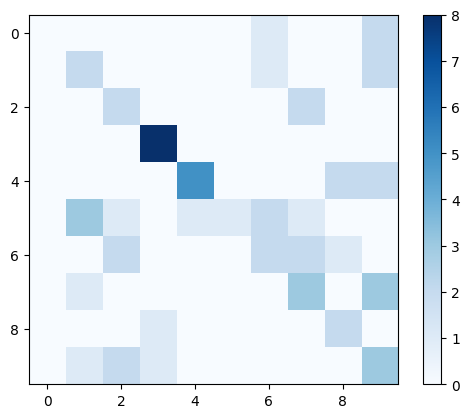

In [12]:
# Evaluation
model.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        predictions = np.argmax(logits, axis=1)

        all_predictions.extend(predictions)
        all_true_labels.extend(batch_labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predictions)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(all_true_labels, all_predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()


# xlm-roberta-base

## Training XLM-RoBERTa Model for Sequence Classification

This code snippet demonstrates how to train a pre-trained XLM-RoBERTa model for sequence classification using PyTorch.

- The `BertForSequenceClassification` model is imported from the Hugging Face Transformers library and initialized with the "xlm-roberta-base" pre-trained model. The number of labels is set to the number of unique authors in the dataset.
- An optimizer (AdamW) is defined with a specified learning rate.
- Hyperparameters such as epochs and batch size are set.
- A learning rate scheduler (CosineAnnealingLR) is defined based on the total number of training steps.
- The model is moved to the appropriate device (GPU if available).
- The training loop iterates over each epoch, and within each epoch, over each batch of the training data. The model is set to training mode, and gradients are calculated and updated based on the loss. Gradients are clipped to prevent exploding gradients. The learning rate scheduler is updated at each step.
- After each epoch, the model is evaluated on the validation data to compute the validation accuracy.
- The best model based on validation accuracy is saved.
- At the end of training, the best model is loaded for further evaluation or inference.

This training process enables the XLM-RoBERTa model to learn from the data and optimize its parameters to make accurate predictions for the sequence classification task.


In [13]:
# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=len(df['author'].unique()))

# Define optimizer and learning rate
learning_rate = 2e-5  # Adjust the learning rate

optimizer = AdamW(model.parameters(), lr=learning_rate)

# Hyperparameters
epochs = 50  # Adjust the number of epochs
batch_size = 32  # Adjust the batch size

total_steps = len(train_dataloader) * epochs

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=total_steps)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

best_val_accuracy = 0.0  # Track the best validation accuracy

for epoch in range(epochs):
    model.train()
    total_train_loss = 0

    for step, batch in enumerate(train_dataloader):
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(batch_input_ids, attention_mask=batch_attention_masks, labels=batch_labels)
        loss = outputs.loss
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)

    # Validation loop
    model.eval()
    val_accuracy = 0
    with torch.no_grad():
        for batch in val_dataloader:
            batch_input_ids = batch[0].to(device)
            batch_attention_masks = batch[1].to(device)
            batch_labels = batch[2].to(device)

            outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
            logits = outputs.logits
            logits = logits.detach().cpu().numpy()
            predictions = np.argmax(logits, axis=1)
            val_accuracy += accuracy_score(predictions, batch_labels.cpu().numpy())

    avg_val_accuracy = val_accuracy / len(val_dataloader)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Train Loss: {avg_train_loss:.4f} | Val Accuracy: {avg_val_accuracy:.4f}")

    # Save the best model
    if avg_val_accuracy > best_val_accuracy:
        best_val_accuracy = avg_val_accuracy
        torch.save(model.state_dict(), "best_model.pt")

# Load the best model
model.load_state_dict(torch.load("best_model.pt"))


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

You are using a model of type xlm-roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerNorm.wei

Epoch 1/50:
  Train Loss: 2.4336 | Val Accuracy: 0.0868
Epoch 2/50:
  Train Loss: 2.3976 | Val Accuracy: 0.0868
Epoch 3/50:
  Train Loss: 2.3461 | Val Accuracy: 0.0312
Epoch 4/50:
  Train Loss: 2.3245 | Val Accuracy: 0.0000
Epoch 5/50:
  Train Loss: 2.3236 | Val Accuracy: 0.0868
Epoch 6/50:
  Train Loss: 2.3259 | Val Accuracy: 0.0625
Epoch 7/50:
  Train Loss: 2.3142 | Val Accuracy: 0.0000
Epoch 8/50:
  Train Loss: 2.3285 | Val Accuracy: 0.0000
Epoch 9/50:
  Train Loss: 2.3171 | Val Accuracy: 0.0868
Epoch 10/50:
  Train Loss: 2.3244 | Val Accuracy: 0.0000
Epoch 11/50:
  Train Loss: 2.3239 | Val Accuracy: 0.0868
Epoch 12/50:
  Train Loss: 2.3289 | Val Accuracy: 0.0312
Epoch 13/50:
  Train Loss: 2.3021 | Val Accuracy: 0.0868
Epoch 14/50:
  Train Loss: 2.2630 | Val Accuracy: 0.0556
Epoch 15/50:
  Train Loss: 2.1847 | Val Accuracy: 0.0312
Epoch 16/50:
  Train Loss: 2.2692 | Val Accuracy: 0.0868
Epoch 17/50:
  Train Loss: 2.0272 | Val Accuracy: 0.1181
Epoch 18/50:
  Train Loss: 1.8586 | Val 

<All keys matched successfully>

## Evaluation

This code snippet evaluates the trained XLM-RoBERTa model on the test dataset, calculating accuracy, generating a classification report, and visualizing the confusion matrix.

- The model is set to evaluation mode (`model.eval()`).
- Predictions and true labels are collected for each batch of the test dataset.
- Accuracy is calculated using `accuracy_score` from `sklearn.metrics`.
- A classification report is generated using `classification_report` from `sklearn.metrics`, providing metrics such as precision, recall, and F1-score for each class.
- A confusion matrix is generated using `confusion_matrix` from `sklearn.metrics` and visualized using `plt.imshow` to show the distribution of predicted labels compared to true labels.

This evaluation process provides insights into the performance of the trained XLM-RoBERTa model on the test dataset, including overall accuracy and detailed metrics for each class.


Accuracy: 0.3709677419354839
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      0.80      0.53         5
           2       0.50      0.75      0.60         4
           3       0.80      1.00      0.89         8
           4       0.50      0.11      0.18         9
           5       0.17      0.11      0.13         9
           6       0.17      0.14      0.15         7
           7       1.00      0.29      0.44         7
           8       0.33      0.67      0.44         3
           9       0.25      0.14      0.18         7

    accuracy                           0.37        62
   macro avg       0.41      0.40      0.36        62
weighted avg       0.44      0.37      0.35        62



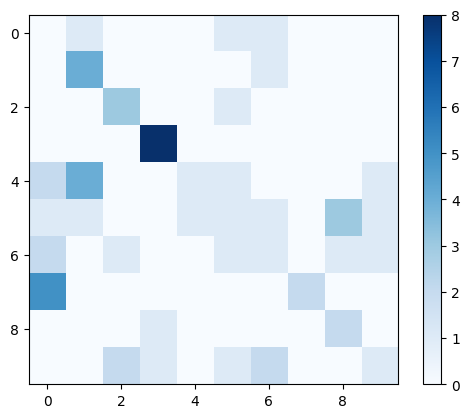

In [14]:
# Evaluation
model.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        predictions = np.argmax(logits, axis=1)

        all_predictions.extend(predictions)
        all_true_labels.extend(batch_labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predictions)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(all_true_labels, all_predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

# distilbert-base-multilingual-cased

## Training DistilBERT Model for Sequence Classification

This code snippet demonstrates how to train a pre-trained DistilBERT model for sequence classification using PyTorch.

- The `BertForSequenceClassification` model is imported from the Hugging Face Transformers library and initialized with the "distilbert-base-multilingual-cased" pre-trained model. The number of labels is set to the number of unique authors in the dataset.
- An optimizer (AdamW) is defined with a specified learning rate.
- Hyperparameters such as epochs and batch size are set.
- A learning rate scheduler (CosineAnnealingLR) is defined based on the total number of training steps.
- The model is moved to the appropriate device (GPU if available).
- The training loop iterates over each epoch, and within each epoch, over each batch of the training data. The model is set to training mode, and gradients are calculated and updated based on the loss. Gradients are clipped to prevent exploding gradients. The learning rate scheduler is updated at each step.
- After each epoch, the model is evaluated on the validation data to compute the validation accuracy.
- The best model based on validation accuracy is saved.
- At the end of training, the best model is loaded for further evaluation or inference.

This training process enables the DistilBERT model to learn from the data and optimize its parameters to make accurate predictions for the sequence classification task.


In [15]:
# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained("distilbert-base-multilingual-cased", num_labels=len(df['author'].unique()))

# Define optimizer and learning rate
learning_rate = 2e-5  # Adjust the learning rate

optimizer = AdamW(model.parameters(), lr=learning_rate)

# Hyperparameters
epochs = 50  # Adjust the number of epochs
batch_size = 32  # Adjust the batch size

total_steps = len(train_dataloader) * epochs

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=total_steps)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

best_val_accuracy = 0.0  # Track the best validation accuracy

for epoch in range(epochs):
    model.train()
    total_train_loss = 0

    for step, batch in enumerate(train_dataloader):
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(batch_input_ids, attention_mask=batch_attention_masks, labels=batch_labels)
        loss = outputs.loss
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)

    # Validation loop
    model.eval()
    val_accuracy = 0
    with torch.no_grad():
        for batch in val_dataloader:
            batch_input_ids = batch[0].to(device)
            batch_attention_masks = batch[1].to(device)
            batch_labels = batch[2].to(device)

            outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
            logits = outputs.logits
            logits = logits.detach().cpu().numpy()
            predictions = np.argmax(logits, axis=1)
            val_accuracy += accuracy_score(predictions, batch_labels.cpu().numpy())

    avg_val_accuracy = val_accuracy / len(val_dataloader)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Train Loss: {avg_train_loss:.4f} | Val Accuracy: {avg_val_accuracy:.4f}")

    # Save the best model
    if avg_val_accuracy > best_val_accuracy:
        best_val_accuracy = avg_val_accuracy
        torch.save(model.state_dict(), "best_model.pt")

# Load the best model
model.load_state_dict(torch.load("best_model.pt"))

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.ou

Epoch 1/50:
  Train Loss: 2.4720 | Val Accuracy: 0.0868
Epoch 2/50:
  Train Loss: 2.3520 | Val Accuracy: 0.0868
Epoch 3/50:
  Train Loss: 2.3724 | Val Accuracy: 0.0312
Epoch 4/50:
  Train Loss: 2.3318 | Val Accuracy: 0.0000
Epoch 5/50:
  Train Loss: 2.3380 | Val Accuracy: 0.0868
Epoch 6/50:
  Train Loss: 2.3220 | Val Accuracy: 0.0000
Epoch 7/50:
  Train Loss: 2.3284 | Val Accuracy: 0.0868
Epoch 8/50:
  Train Loss: 2.3274 | Val Accuracy: 0.0000
Epoch 9/50:
  Train Loss: 2.3071 | Val Accuracy: 0.0000
Epoch 10/50:
  Train Loss: 2.3118 | Val Accuracy: 0.1181
Epoch 11/50:
  Train Loss: 2.3297 | Val Accuracy: 0.0868
Epoch 12/50:
  Train Loss: 2.3109 | Val Accuracy: 0.0868
Epoch 13/50:
  Train Loss: 2.2812 | Val Accuracy: 0.0312
Epoch 14/50:
  Train Loss: 2.1788 | Val Accuracy: 0.1424
Epoch 15/50:
  Train Loss: 1.9884 | Val Accuracy: 0.0312
Epoch 16/50:
  Train Loss: 1.9649 | Val Accuracy: 0.0938
Epoch 17/50:
  Train Loss: 1.8147 | Val Accuracy: 0.2049
Epoch 18/50:
  Train Loss: 1.7085 | Val 

<All keys matched successfully>

## Evaluation

This code snippet evaluates the trained DistilBERT model on the test dataset, calculating accuracy, generating a classification report, and visualizing the confusion matrix.

- The model is set to evaluation mode (`model.eval()`).
- Predictions and true labels are collected for each batch of the test dataset.
- Accuracy is calculated using `accuracy_score` from `sklearn.metrics`.
- A classification report is generated using `classification_report` from `sklearn.metrics`, providing metrics such as precision, recall, and F1-score for each class.
- A confusion matrix is generated using `confusion_matrix` from `sklearn.metrics` and visualized using `plt.imshow` to show the distribution of predicted labels compared to true labels.

This evaluation process provides insights into the performance of the trained DistilBERT model on the test dataset, including overall accuracy and detailed metrics for each class.


Accuracy: 0.3870967741935484
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.40      0.50         5
           2       0.38      0.75      0.50         4
           3       0.86      0.75      0.80         8
           4       0.75      0.33      0.46         9
           5       0.33      0.33      0.33         9
           6       0.25      0.14      0.18         7
           7       0.40      0.29      0.33         7
           8       0.29      0.67      0.40         3
           9       0.25      0.29      0.27         7

    accuracy                           0.39        62
   macro avg       0.42      0.39      0.38        62
weighted avg       0.46      0.39      0.40        62



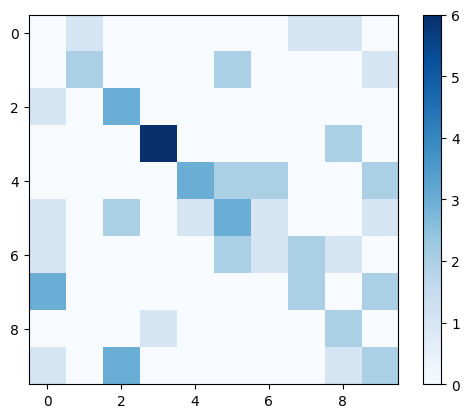

In [16]:
# Evaluation
model.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        predictions = np.argmax(logits, axis=1)

        all_predictions.extend(predictions)
        all_true_labels.extend(batch_labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predictions)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(all_true_labels, all_predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()